# Part 6: K-Means – DBSCAN clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.6 MB/s eta 0:00:00


In [3]:
pip install mapclassify

In [4]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not

In [64]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer
from matplotlib import pyplot as plt
import seaborn as sns
import imageio
import pathlib
import mapclassify as mc
from lonboard import viz
from lonboard import Map, SolidPolygonLayer, ScatterplotLayer

plt.rcParams['figure.figsize'] = [10, 8]

In [6]:
import zipfile
import os

# Define the folder containing the zip files
folder_with_zips = '/content/drive/MyDrive/Colab Notebooks/data/'  # Replace with the path to your drive folder if needed

# Ensure the output directory exists
output_dir = '/content/drive/MyDrive/Colab Notebooks/data/'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the files in the folder
for filename in os.listdir(folder_with_zips):
    file_path = os.path.join(folder_with_zips, filename)


### Task 1 Data Exploration: Load the Chicago parcels dataset using Pandas.

In [7]:
chicago_parcels = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/chicago_parcels/Chicago_parcels.shp')

### Task 2: Display the first few rows of the dataset. Investigate the available attributes and their data types.

In [8]:
chicago_parcels.head(10)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."
5,6,98,0.00,836301007,836301007,"POLYGON ((1091889.266 1942159.981, 1091833.063..."
6,7,97,0.02,836301003,836301003,"POLYGON ((1091753.543 1941824.459, 1091716.520..."
7,8,5,0.03,836100006,836100006,"POLYGON ((1092172.233 1942219.598, 1092135.727..."
8,9,7,0.00,836101008,836101008,"POLYGON ((1092423.468 1945012.166, 1092400.259..."
9,10,17,0.01,836101028,836101028,"POLYGON ((1092434.770 1945796.435, 1092773.374..."


### Task 3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a dataset with more than a half millions of records, therefore if you use the traditional matplotlib or pandas you will reach the RAM limit of Colab, you need to use lonboard library and the SolidPolygonLayer layer to render polygons.

In [11]:
chicago_parcels.shape

(592521, 6)

In [14]:
(chicago_parcels["ID"].isnull() | chicago_parcels["AREA"].isnull()).mean()

0.0

In [21]:
geometry_list = chicago_parcels['geometry'].to_list()

In [23]:

gdf_parcels = gpd.GeoDataFrame(chicago_parcels, geometry=geometry_list)
gdf_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [24]:
gdf_parcels.total_bounds


array([1091173.15922881, 1813913.37750871, 1205119.21461458,
       1952997.78968386])

In [26]:
ld_bbox = [1091173.15922881, 1813913.37750871, 1205119.21461458, 1952997.78968386]

In [27]:
gdf_parcels = gdf_parcels[gdf_parcels.intersects(shapely.box(*ld_bbox))]

In [71]:
viz(gdf_parcels)


/usr/local/lib/python3.10/dist-packages/lonboard/_viz.py:156: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


### Task 4: Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude) and numerical attributes. Using the text cell, provide insights into any observed correlations.

Spatial data points can be grouped based on their geographical coordinates. In this way spatial attributes are correlated to numerical attributes, whereby the
the 'what' can be associated to the 'where'.

### Task 5: K-Means Clustering: Implement K-Means clustering with different values of n_clusters.

In [77]:

kmeans = KMeans(n_clusters=3, random_state=42)
gdf_parcels['kmeans_cluster'] = kmeans.fit_predict(gdf_parcels[['AREA','ID']])
plt.show ()

kmeans_10 = KMeans(n_clusters=4, random_state=42)
gdf_parcels['kmeans_cluster_2'] = kmeans.fit_predict(gdf_parcels[['AREA','ID']])
plt.show ()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

### Task 6: Visualize the clustering results for each value of n_clusters, using multiple lonboard maps, and customized colour ramps.

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


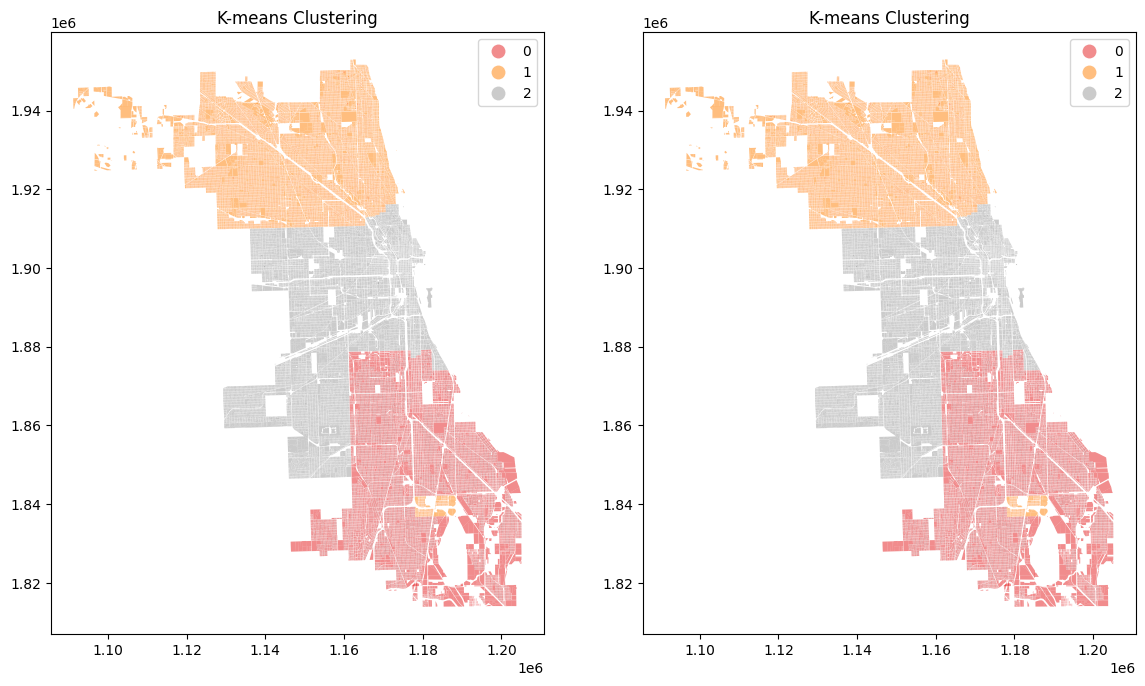

In [75]:
#Visualize clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# K-means
gdf_parcels.plot(ax=axes[0], column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[0].set_title('K-means Clustering')

gdf_parcels.plot(ax=axes[1], column='kmeans_cluster_2', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[1].set_title('K-means Clustering')

plt.show ()


### Task 7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your choice in a markdown cell.

### Task 8: DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of eps and min_samples in DBSCAN ( at least three)

In [80]:
dbscan = DBSCAN(eps=0.005, min_samples=40)
gdf_parcels['dbscan_cluster_1'] = dbscan.fit_predict(gdf_parcels[['ID', 'AREA']])

dbscan = DBSCAN(eps=0.01, min_samples=15)
gdf_parcels['dbscan_cluster_2'] = dbscan.fit_predict(gdf_parcels[['ID', 'AREA']])

dbscan = DBSCAN(eps=1, min_samples=5)
gdf_parcels['dbscan_cluster_3'] = dbscan.fit_predict(gdf_parcels[['ID', 'AREA']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


Text(0.5, 1.0, 'DBSCAN Clustering 2')

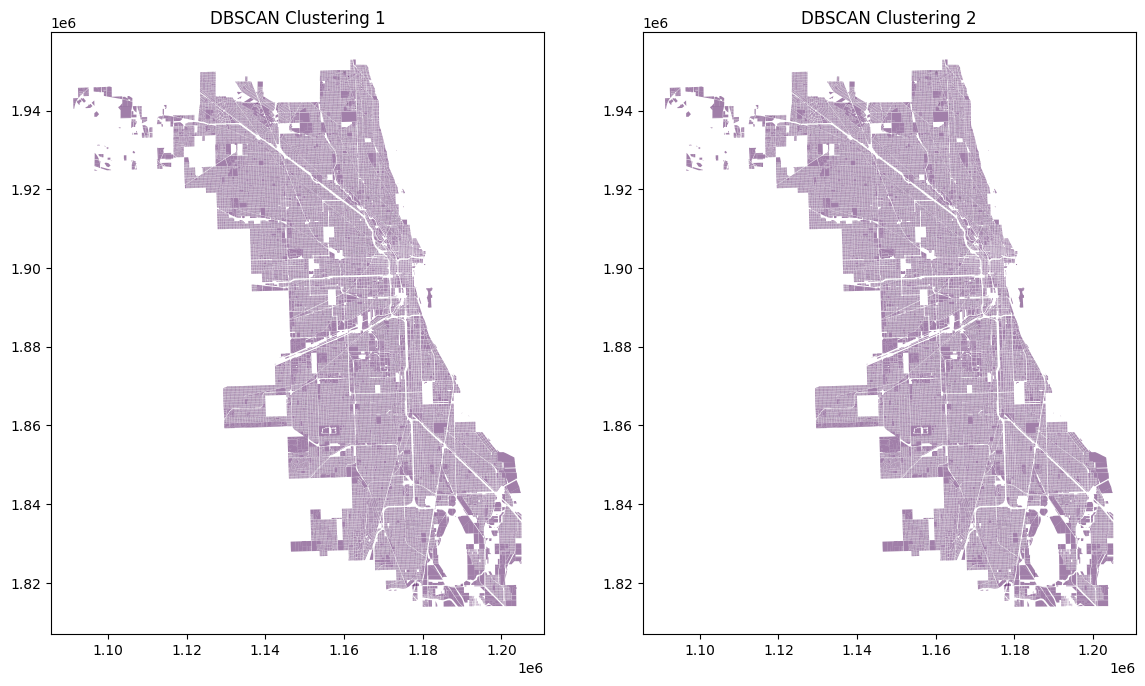

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

gdf_parcels.plot(ax=axes[0], column='dbscan_cluster_1', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0].set_title('DBSCAN Clustering 1')

gdf_parcels.plot(ax=axes[1], column='dbscan_cluster_2', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1].set_title('DBSCAN Clustering 2')

plt.show ()



### Task 9: Plot the clustering results for each combination of parameters. Therefore, you should create a plot matrix 3*3 ( min_samples and eps)

### Task 10: Using a text cell provide you insights and evaluation of the impact of changes in eps and min_samples on the clusters, and finally recommend suitable values for eps and min_samples based on your analysis. Note: Consider the real-world implications of your findings, especially in the context of urban planning or data-driven decision-making.